## Seção 04 - RNN e Classificação de Textos
# Aluno: Bruno Moreira Ribas 

# Senoidal : Predição de Série Temporal

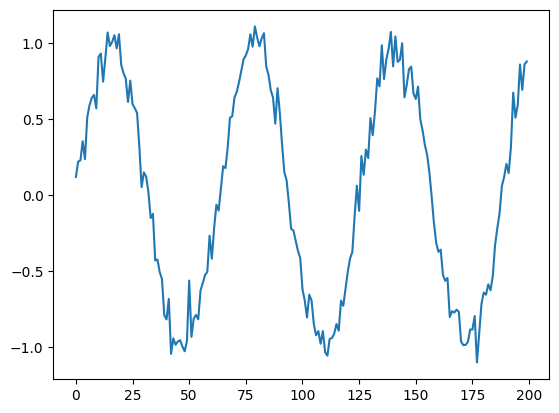

In [1]:

import tensorflow as tf
tf.__version__
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
     

series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [2]:

T = 10 # tamanho da janela
D = 1 # quantidade de dados
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1) # Fica N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (190, 10, 1)  Y.shape:  (190,)


In [3]:

i = Input(shape=(T, 1))
x = SimpleRNN(5, activation="relu")(i)
x = Dense(1)(x)
model = Model(i, x)

In [4]:

model.compile(
loss="mse",
optimizer=Adam(learning_rate=0.1)
)

In [5]:

r = model.fit(
X[:-N//2], Y[:-N//2],
epochs=80,
validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
3/3 [==============================] - 5s 387ms/step - loss: 0.1317 - val_loss: 0.0741
Epoch 2/80
3/3 [==============================] - 0s 58ms/step - loss: 0.0626 - val_loss: 0.0572
Epoch 3/80
3/3 [==============================] - 0s 77ms/step - loss: 0.0474 - val_loss: 0.0280
Epoch 4/80
3/3 [==============================] - 0s 89ms/step - loss: 0.0305 - val_loss: 0.0355
Epoch 5/80
3/3 [==============================] - 0s 58ms/step - loss: 0.0349 - val_loss: 0.0218
Epoch 6/80
3/3 [==============================] - 0s 45ms/step - loss: 0.0208 - val_loss: 0.0376
Epoch 7/80
3/3 [==============================] - 0s 57ms/step - loss: 0.0274 - val_loss: 0.0259
Epoch 8/80
3/3 [==============================] - 0s 44ms/step - loss: 0.0241 - val_loss: 0.0257
Epoch 9/80
3/3 [==============================] - 0s 68ms/step - loss: 0.0227 - val_loss: 0.0278
Epoch 10/80
3/3 [==============================] - 0s 76ms/step - loss: 0.0228 - val_loss: 0.0255
Epoch 11/80
3/3 [===========

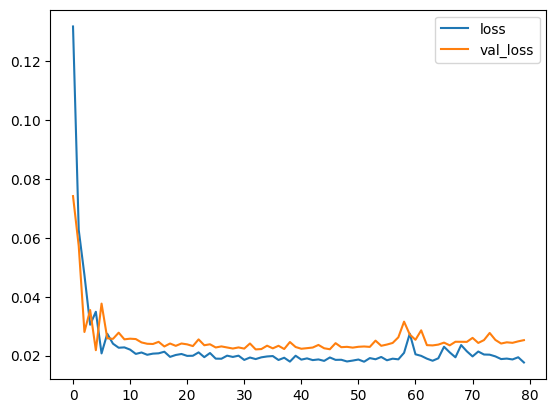

In [6]:

plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

In [7]:

validation_target = Y[-N//2:]
validation_predictions = []
i = -N//2
while len(validation_predictions) < len(validation_target):
  p = model.predict( X[i].reshape(1, -1, 1))[0, 0]
  i += 1
  validation_predictions.append(p)

1/1 [==============================] - 0s 22ms/step


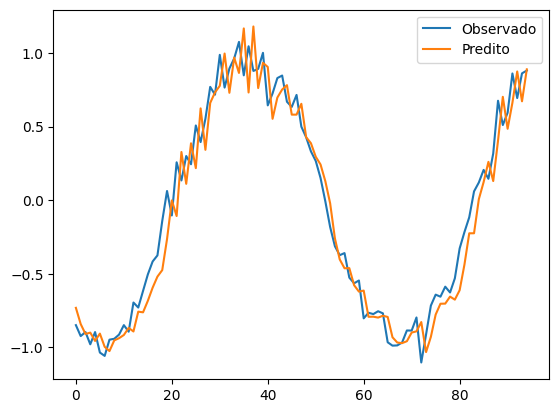

In [8]:

plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

# Passageiros : Predição de Série Temporal

In [9]:

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
tf.__version__

'2.12.0'

--2023-05-05 11:46:50--  http://www.razer.net.br/datasets/airline-passengers.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/csv]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2023-05-05 11:46:50 (159 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



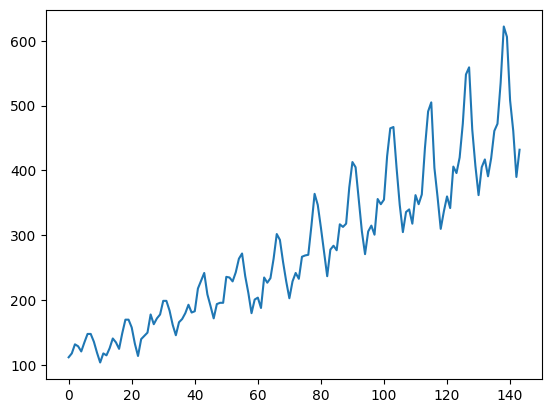

In [10]:
!wget http://www.razer.net.br/datasets/airline-passengers.csv
df = pd.read_csv("airline-passengers.csv", usecols=[1])
df.head()
plt.plot(df)
plt.show()

In [11]:

series = df.values
series = series.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
series = scaler.fit_transform(series)
# tamanho da base de treino – 67% do total
train_size = int(len(series) * 0.67)

In [12]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1) # Fica N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)
     

X.shape:  (134, 10, 1)  Y.shape:  (134, 1)


In [13]:

i = Input(shape=(T, 1))
x = SimpleRNN(5, activation=None)(i)
# x = SimpleRNN(5, activation="relu")(i)
# x = SimpleRNN(5)(i) # tanh por default
x = Dense(1)(x)
model = Model(i, x)

In [14]:

model.compile(
loss="mse",
optimizer=Adam(learning_rate=0.1)
)
r = model.fit(
X[:train_size], Y[:train_size],
epochs=80,
validation_data=(X[-train_size:], Y[-train_size:])
)

Epoch 1/80
3/3 [==============================] - 2s 180ms/step - loss: 1.8082 - val_loss: 0.0595
Epoch 2/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0503 - val_loss: 0.0530
Epoch 3/80
3/3 [==============================] - 0s 32ms/step - loss: 0.0134 - val_loss: 0.0170
Epoch 4/80
3/3 [==============================] - 0s 31ms/step - loss: 0.0162 - val_loss: 0.0195
Epoch 5/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0136 - val_loss: 0.0316
Epoch 6/80
3/3 [==============================] - 0s 42ms/step - loss: 0.0168 - val_loss: 0.0652
Epoch 7/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0161 - val_loss: 0.0111
Epoch 8/80
3/3 [==============================] - 0s 32ms/step - loss: 0.0164 - val_loss: 0.0102
Epoch 9/80
3/3 [==============================] - 0s 35ms/step - loss: 0.0164 - val_loss: 0.0167
Epoch 10/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0131 - val_loss: 0.0103
Epoch 11/80
3/3 [===========

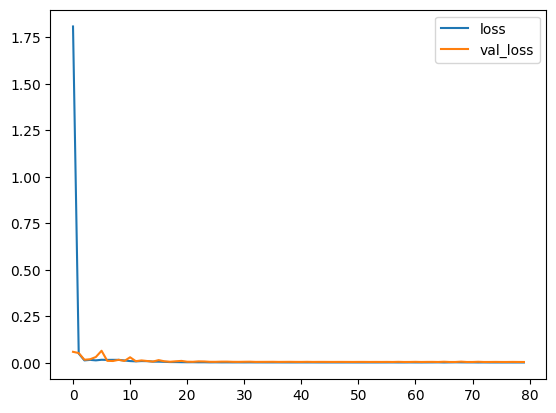

In [15]:

plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

1/1 [==============================] - 0s 37ms/step


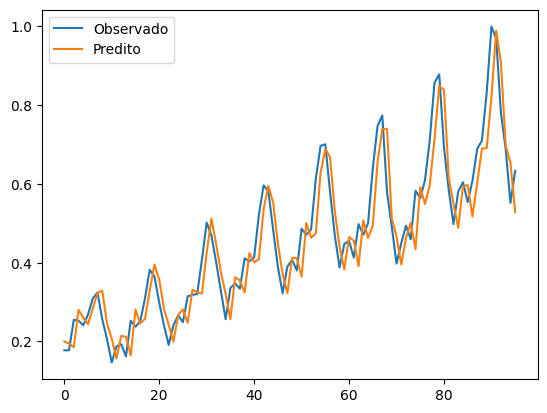

In [16]:

validation_target = Y[-train_size:]
validation_predictions = []
i = -train_size
while len(validation_predictions) < len(validation_target):
  p = model.predict( X[i].reshape(1, -1, 1))[0, 0]
  i += 1
  validation_predictions.append(p)
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

1/1 [==============================] - 0s 25ms/step


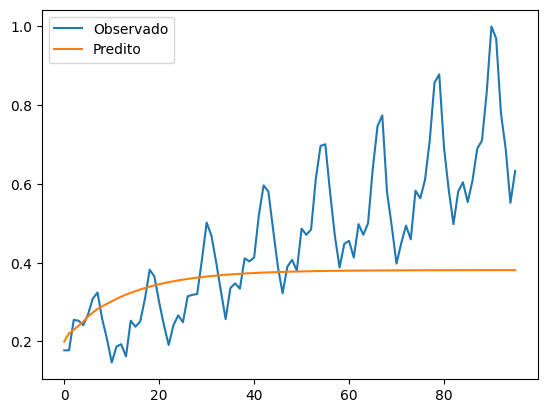

In [17]:

validation_target = Y[-train_size:]
validation_predictions = []
last_x = X[-train_size]
while len(validation_predictions) < len(validation_target):
  p = model.predict( last_x.reshape(1, -1, 1))[0, 0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

# IMDB : Classificação de reviews

In [18]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
tf.__version__

'2.12.0'

In [19]:

num_words = 20000 # número de palavras
maxlen = 200 # máximo palavras no review
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


In [20]:
x_train.shape


(25000,)

In [21]:
x_train


array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [22]:
print(len(x_train[0]), len(x_train[1]))


218 189


In [23]:

x_train = pad_sequences(x_train, maxlen=maxlen)
print(len(x_train[0]), len(x_train[1]))

200 200


In [24]:

x_test = pad_sequences(x_test, maxlen=maxlen)
print(len(x_test[0]), len(x_test[1]))

200 200


In [25]:

# Construir a RNN
# recebe como entrada maxlen palavras
i = Input(shape=(x_train.shape[1], ))
# com textos precisa da camada de
# - representação numérica das palavras
# num_words palavras e 128 características para representar
# cada palavra (colunas)
# Não tem relação com a quantidade de unidades da LSTM
x = Embedding(input_dim=num_words, output_dim=128)(i)
x = LSTM(units=128, activation="tanh")(x)
x = Dense(units=1, activation="sigmoid")(x)
model = Model(i, x)

In [26]:

# para RNN melhor rmsprop
model.compile(optimizer="rmsprop", loss="binary_crossentropy",
metrics=["accuracy"])
model.summary()
     

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [27]:

epochs = 10
r = model.fit(x_train, y_train, epochs=epochs, batch_size=128)

Epoch 1/10
196/196 [==============================] - 162s 814ms/step - loss: 0.5550 - accuracy: 0.7009
Epoch 2/10
196/196 [==============================] - 157s 802ms/step - loss: 0.3472 - accuracy: 0.8546
Epoch 3/10
196/196 [==============================] - 160s 816ms/step - loss: 0.2850 - accuracy: 0.8880
Epoch 4/10
196/196 [==============================] - 158s 806ms/step - loss: 0.2370 - accuracy: 0.9100
Epoch 5/10
196/196 [==============================] - 158s 805ms/step - loss: 0.2059 - accuracy: 0.9235
Epoch 6/10
196/196 [==============================] - 157s 801ms/step - loss: 0.1811 - accuracy: 0.9329
Epoch 7/10
196/196 [==============================] - 156s 799ms/step - loss: 0.1526 - accuracy: 0.9444
Epoch 8/10
196/196 [==============================] - 156s 799ms/step - loss: 0.1320 - accuracy: 0.9536
Epoch 9/10
196/196 [==============================] - 156s 799ms/step - loss: 0.1104 - accuracy: 0.9621
Epoch 10/10
196/196 [==============================] - 156s 799m

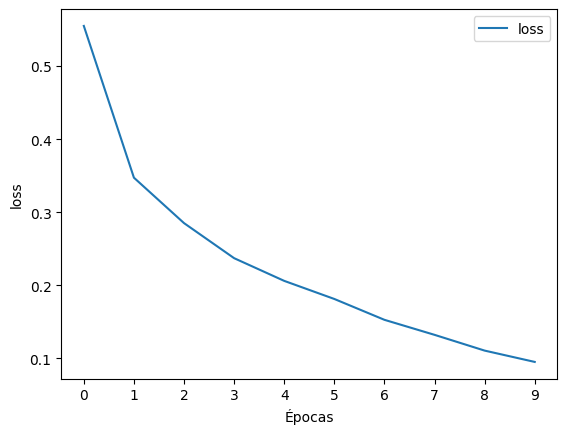

In [28]:

plt.plot( r.history["loss"], label="loss")
plt.xlabel("Épocas")
plt.ylabel("loss")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

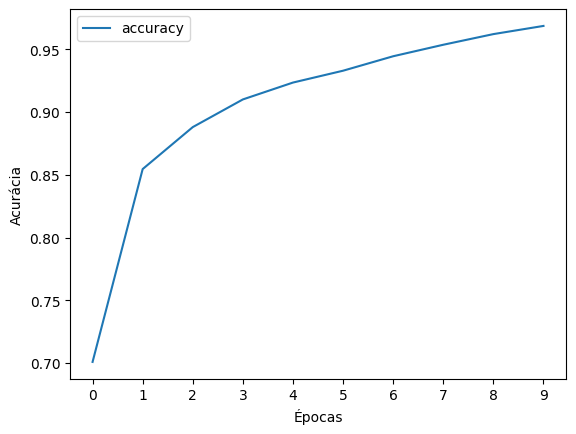

In [29]:

plt.plot( r.history["accuracy"], label="accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

In [30]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

782/782 [==============================] - 97s 123ms/step - loss: 0.4441 - accuracy: 0.8646
0.8646000027656555


In [31]:

texto = [[4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766]]
entrada = pad_sequences(texto, 200)
sent = np.round(model.predict(entrada))
print( "Positivo" if sent==1 else "Negativo" )

1/1 [==============================] - 1s 626ms/step
Negativo


# SPAM : Classificação de e-mails

In [32]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [33]:

!wget http://www.razer.net.br/datasets/spam.csv
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.head()
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ["labels", "data"]
df["b_labels"] = df["labels"].map({ "ham": 0, "spam" : 1})
y = df["b_labels"].values

--2023-05-05 12:16:07--  http://www.razer.net.br/datasets/spam.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.09s   

2023-05-05 12:16:08 (5.44 MB/s) - ‘spam.csv’ saved [503663/503663]



In [34]:
x_train, x_test, y_train, y_test = train_test_split(df["data"], y, test_size=0.33)


In [35]:

# Número máximo de palavras para considerar
# São consideradas as mais frequentes, as demais são
# ignoradas
num_words = 20000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
word2index = tokenizer.word_index
V = len(word2index)
print("%s tokens" % V)

7158 tokens


In [36]:

data_train = pad_sequences(sequences_train)
T = data_train.shape[1] # tamanho da sequência
data_test = pad_sequences(sequences_test, maxlen=T)
print("data_train.shape: ", data_train.shape)
print("data_test.shape: ", data_test.shape)

data_train.shape:  (3733, 162)
data_test.shape:  (1839, 162)


In [37]:

D = 20 # tamanho do embedding, hiperparâmetro que pode ser escolhido
M = 15 # tamanho do hidden state
i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
# x = LSTM(M)(x) # tirar o GlobalMaxPooling1D()
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
     

In [38]:

model.compile(
  loss="binary_crossentropy",
  optimizer="adam",
  metrics=["accuracy"]
)
epochs = 10
r = model.fit(
    data_train,
    y_train,
    epochs=epochs,
    validation_data=(data_test, y_test))

Epoch 1/10
117/117 [==============================] - 14s 96ms/step - loss: 0.4651 - accuracy: 0.8511 - val_loss: 0.4160 - val_accuracy: 0.8543
Epoch 2/10
117/117 [==============================] - 10s 84ms/step - loss: 0.3810 - accuracy: 0.8717 - val_loss: 0.4119 - val_accuracy: 0.8543
Epoch 3/10
117/117 [==============================] - 10s 83ms/step - loss: 0.3716 - accuracy: 0.8717 - val_loss: 0.3905 - val_accuracy: 0.8543
Epoch 4/10
117/117 [==============================] - 11s 91ms/step - loss: 0.2914 - accuracy: 0.8717 - val_loss: 0.2621 - val_accuracy: 0.8543
Epoch 5/10
117/117 [==============================] - 11s 91ms/step - loss: 0.1795 - accuracy: 0.9124 - val_loss: 0.1970 - val_accuracy: 0.9358
Epoch 6/10
117/117 [==============================] - 11s 91ms/step - loss: 0.1058 - accuracy: 0.9896 - val_loss: 0.1092 - val_accuracy: 0.9739
Epoch 7/10
117/117 [==============================] - 9s 80ms/step - loss: 0.0372 - accuracy: 0.9957 - val_loss: 0.0887 - val_accuracy: 

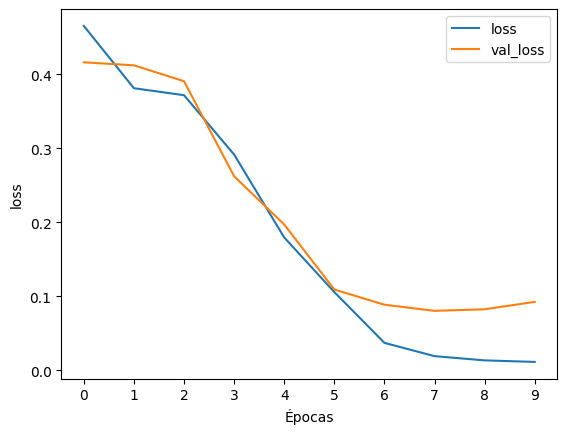

In [39]:

plt.plot( r.history["loss"], label="loss")
plt.plot( r.history["val_loss"], label="val_loss")
plt.xlabel("Épocas")
plt.ylabel("loss")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

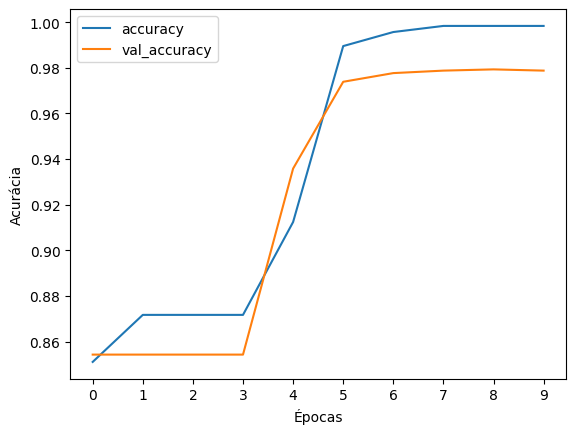

In [40]:

plt.plot( r.history["accuracy"], label="accuracy")
plt.plot( r.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

In [41]:

texto = "Before I introduce myself  "
seq_texto = tokenizer.texts_to_sequences([texto])
data_texto = pad_sequences(seq_texto, maxlen=T)
pred = model.predict(data_texto)
print(pred)
print ("SPAM" if pred >= 0.5 else "OK")
     

1/1 [==============================] - 0s 464ms/step
[[0.00397403]]
OK


# Shakespeare: Geração de texto

In [42]:
import tensorflow as tf
import numpy as np
import os
import time


path_to_file = tf.keras.utils.get_file('shakespeare.txt','https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
# Leitura do texto
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# Tamanho do texto em número de caracteres
print(f'Tamanho do texto: {len(text)} caracteres')
# Primeiros 250 caracteres do texto
print(text[:250])
# Caracteres únicos
vocab = sorted(set(text))
print(f'{len(vocab)} caracters únicos')

1115394/1115394 [==============================] - 0s 0us/step
Tamanho do texto: 1115394 caracteres
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

65 caracters únicos


In [43]:

# Processamento do texto
# Converte um caractere em um ID único
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)
# Faz o contrário, converte os IDs em caracteres
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)
# Função onde, dado uma lista de IDs, gera o texto
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [44]:

# Gerar base de treino
# Exemplo : Para a palagra "Hello"
# Suponha seq_length = 4
# Então: Entrada "Hell" e Saída "ello"
# Tem que dividir o texto em pedaços de tamanho seq_length+1
# from_tensor_slices - cria um dataset com os dados
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)
# Converte as sequências no tamanho desejado : seq_length+1
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [45]:

# Função onde, dado uma sequência "Hello", gera entrada e saída: "Hell" e "ello"
def split_input_target(sequence):
  input_text = sequence[:-1]
  target_text = sequence[1:]
  return input_text, target_text
# dataset contém as sequências contendo entrada e saída
dataset = sequences.map(split_input_target)
# Criar lotes de treinamento
# Batch size
BATCH_SIZE = 64
# Tamanho do buffer para randomizar o dataset
BUFFER_SIZE = 10000
dataset = (
dataset
  .shuffle(BUFFER_SIZE)
  .batch(BATCH_SIZE, drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))

In [46]:

# Construir o modelo
# Tamanho do vocabulário em número de caracteres
vocab_size = len(vocab)
# Dimensão do Embedding
embedding_dim = 256
# Número de unidades RNN
rnn_units = 1024

In [47]:
# Classe que gera o modelo: Embedding -> GRU -> Dense
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                  return_sequences=True,
                                  return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)
  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)
    if return_state:
      return x, states
    else:
      return x
     

In [48]:

# Criação do modelo
model = MyModel(
# Be sure the vocabulary size matches the `StringLookup` layers.
vocab_size=len(ids_from_chars.get_vocabulary()),
embedding_dim=embedding_dim,
rnn_units=rnn_units)
     
     
# Função de perda é sparse_categorical_crossentropy
# Modelo retorna Logits, sinaliza from_logits
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
# Compila o modelo
model.compile(optimizer='adam', loss=loss)
# Treinar
EPOCHS = 20
history = model.fit(dataset, epochs=EPOCHS)

Epoch 1/20
172/172 [==============================] - 1055s 6s/step - loss: 2.7248
Epoch 2/20
172/172 [==============================] - 1044s 6s/step - loss: 1.9916
Epoch 3/20
172/172 [==============================] - 1035s 6s/step - loss: 1.7153
Epoch 4/20
172/172 [==============================] - 1061s 6s/step - loss: 1.5552
Epoch 5/20
172/172 [==============================] - 1167s 7s/step - loss: 1.4561
Epoch 6/20
172/172 [==============================] - 1071s 6s/step - loss: 1.3877
Epoch 7/20
172/172 [==============================] - 1148s 7s/step - loss: 1.3355
Epoch 8/20
172/172 [==============================] - 1160s 7s/step - loss: 1.2897
Epoch 9/20
172/172 [==============================] - 1156s 7s/step - loss: 1.2489
Epoch 10/20
172/172 [==============================] - 1152s 7s/step - loss: 1.2088
Epoch 11/20
172/172 [==============================] - 1171s 7s/step - loss: 1.1706
Epoch 12/20
172/172 [==============================] - 1061s 6s/step - loss: 1.1289
E

In [49]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars
    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)
  
  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()
    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
    return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask
    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)
    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)
    # Return the characters and model state.
    return predicted_chars, states


    
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)
# Executar em um laço para gera o texto
start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]
for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)
result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

ROMEO:
The sweetest ladies not it in the Tower,
Who thinks me groan Dicl me in spleen
On the gates, mark where she would not hence
And cried 'ARCALUS:
Where are thy tubbury?
Who selves?

ANGELO:
And she shall. Let me for truth me from him:
Merdy as prisoners, and so brief a good,
Yet knows no levy head befaly as e'er
I dare not wonth even now, while id the ropegor
To louser than continue in your lights.

MONTAGUE:
And this way to the gods;
Mark'd you this afflict of this? look and
Three there, I should live on her maid is age
Of all tongues from the world can corn hath made you.
What says he of Aury God, why, then all true penjery
Thou shalt command; then, would the word it it.

DUKE OF AUMERLE:
I know not, meavers.

MENENIUS:
Do you think it be, thou wert know,
Did not my life but kill 'em. But I am dull to him?
And freely he was, many one how to
the Lady Bona. Gentlemen,
Look, signify a crupper, that thou shouldst have
The time that Rome Hastings, all overpect post
Thy words will eve